In [49]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [50]:
poverty_csv = pd.read_csv("Poverty_Total_Clean_3.csv")
poverty_df = pd.DataFrame(poverty_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [51]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
poverty_df = poverty_df[["county","Poverty_Rate"]]
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})
poverty_df.head()

,county,Poverty_Rate
0,"Autauga, AL",2.579372
1,"Baldwin, AL",1.747980
2,"Barbour, AL",2.478209
3,"Bibb, AL",3.495913
4,"Blount, AL",2.880495


In [52]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [53]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Leelanau, MI",86.9
1,"Young, TX",78.3
2,"Niagara, NY",71.5
3,"Johnson, KS",68.9
4,"Adams, ID",79.8


In [54]:
poverty_analysis = sample_home_ownership.merge(poverty_df, on="county")
poverty_analysis.head()

,county,HOR,Poverty_Rate
0,"Leelanau, MI",86.9,1.236952
1,"Young, TX",78.3,1.804700
2,"Niagara, NY",71.5,1.554266
3,"Johnson, KS",68.9,1.151106
4,"Adams, ID",79.8,0.705329


In [55]:
len(poverty_analysis)

625

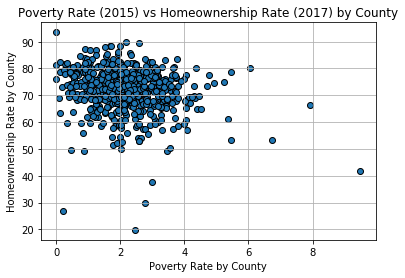

In [60]:
plt.scatter(poverty_analysis["Poverty_Rate"], poverty_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Poverty Rate (2015) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Poverty Rate by County")
plt.grid(True)
plt.savefig('Pictures/Poverty_rate_scatter.png')

In [57]:
x = poverty_analysis["Poverty_Rate"]
y = poverty_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              2057.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):                   1.06e-199
Time:                        18:43:09   Log-Likelihood:                         -3107.2
No. Observations:                 625   AIC:                                      6216.
Df Residuals:                     624   BIC:                                      6221.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Poverty_Rate    26.6052      0.587     45.355      0.000      25.453      27.757
==============================================================================
Omnibus:                      180.166   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.073
Skew:                          -1.202   Prob(JB):                    1.94e-194
Kurtosis:                       8.336   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

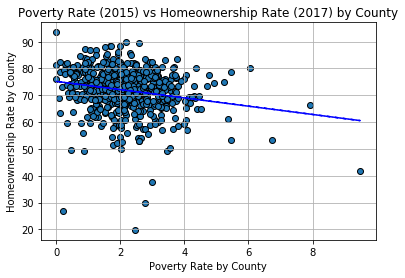

In [61]:
plt.scatter(poverty_analysis["Poverty_Rate"], poverty_analysis["HOR"], marker="o", edgecolor='black')
plt.title("Poverty Rate (2015) vs Homeownership Rate (2017) by County")
plt.ylabel("Homeownership Rate by County")
plt.xlabel("Poverty Rate by County")
plt.grid(True)
plt.plot(x, fit, 'b--')
plt.savefig('Pictures/Poverty_rate_regression.png')